# <center> <span style="color:purple"> Breast cancer prediction </span>
### <span style="color:darkblue"> Author </span> 
<span style="color:black"> Leidy Alfonso, lpalfonsoa@gmail.com </span> 

### <span style="color:darkblue"> Objetive:  </span>  
+ Understand the Dataset & cleanup (if required). 

+ Develop classification models that can accurately predict whether a cancer type is malignant or benign.

+ Compare the evaluation metrics of different classification algorithms to determine which ones perform best in this context.

<span style="color:darkblue"> Description:  </span>  
<p style="text-align: justify;">  According to the World Health Organization (WHO), breast cancer is the most common cancer globally, with 2.3 million women diagnosed and 685,000 deaths from the disease in 2020. As of the end of that year, there were 7.8 million women worldwide who had been diagnosed with breast cancer in the previous five years and were still alive. 
With the increasing prevalence of breast cancer, understanding the factors that contribute to its development and progression, as well as developing effective prevention and treatment strategies, is vital. Early detection is also critical in improving the chances of successful treatment and recovery. Data analysis is a valuable tool for studying breast cancer, as it allows researchers to identify patterns and trends that can help improve our understanding of the disease being particularly valuable in predicting whether a breast tumor is benign or malignant. </p>

<p style="text-align: justify;"> After conducting preprocessing of the dataset to ensure its cleanliness and quality, as well as an exploratory analysis to gain a deeper understanding of its characteristics and underlying patterns, various classification algorithms were implemented to predict whether the cancer type is malignant or benign. By evaluating the performance of these algorithms on the preprocessed data, we have obtained insights into the efficacy of these models in accurately detecting malignancy. </p>


<span style="color:darkblue"> Acknowledgements:  </span>  
This dataset has been referred from Kaggle.


In [122]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
#-------------------Exploring data set---------------
#----------Load data-----------
df = pd.read_csv("./Data_sets/BreastCancer.csv")
print('Dataset size (rows, columns): ',df.shape)
print('Features:', df.columns)
display(df.head())

Dataset size (rows, columns):  (569, 33)
Features: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 <p style="text-align: justify;">  The dataset includes a column with a data type of "object" which have cathegorical data and another column containing null values. It has also been determined that the ID column does not provide relevant information for the project's objectives. As a result, it has been decided to remove these columns from the dataset to improve the accuracy and relevance of data analysis and the diagnosis data is critical and will be preserved as the target variable. </p>

In [23]:
#---------- Preprocessing data-----------
data = df.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)
data_diag = df['diagnosis']
display(data.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of benign and malignant cases:  Counter({'B': 357, 'M': 212})


Text(0.5, 0, 'Diagnosis')

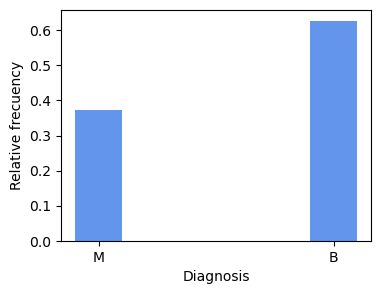

In [104]:
#Visualizing cathegorical data
ctr = Counter(data_diag)
print("Number of benign and malignant cases: ", ctr)
ctr_values = [value / data_diag.shape[0] for value in ctr.values()]
plt.figure(figsize = (4, 3))
plt.bar(ctr.keys(), ctr_values, color ='cornflowerblue', width = 0.2)
plt.ylabel("Relative frecuency")
plt.xlabel("Diagnosis")

The dataset shows a 60-40 split between malignant and benign cases, with the former comprising the majority. The next step involves examining the descriptive statistics of the dataset.

In [105]:
#Statistical description
statisc = data.describe()
print(statisc)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In order to obtain better results in the predictive models to be implemented, the data will be scaled. Also, some variables will be plotted to visualize their frequency distribution.

In [114]:
scaler = StandardScaler()
data_new = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
#display(data_new.head())

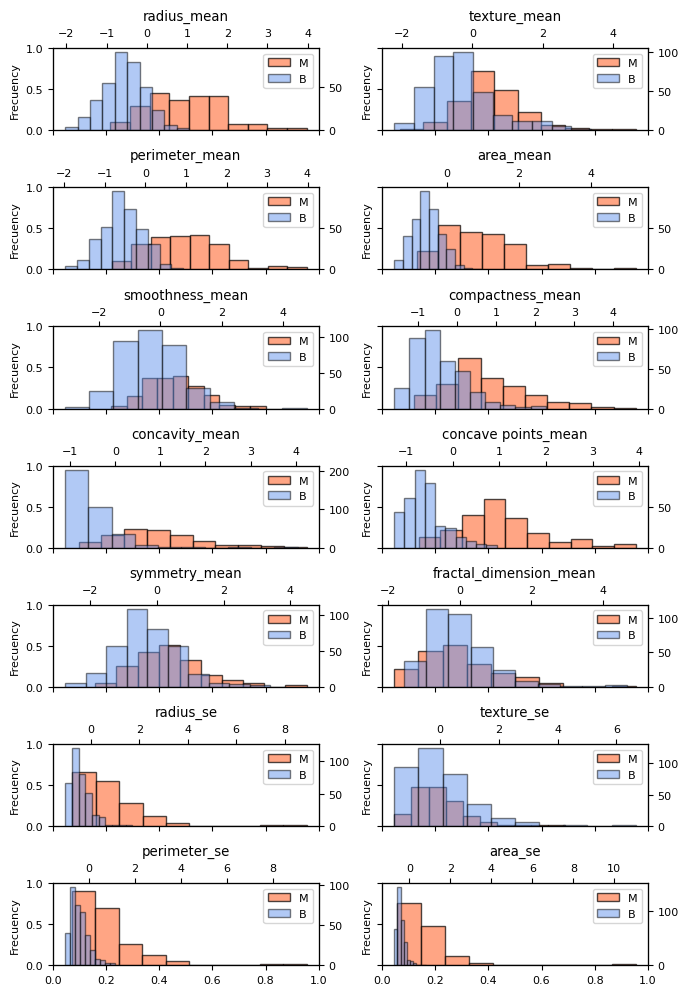

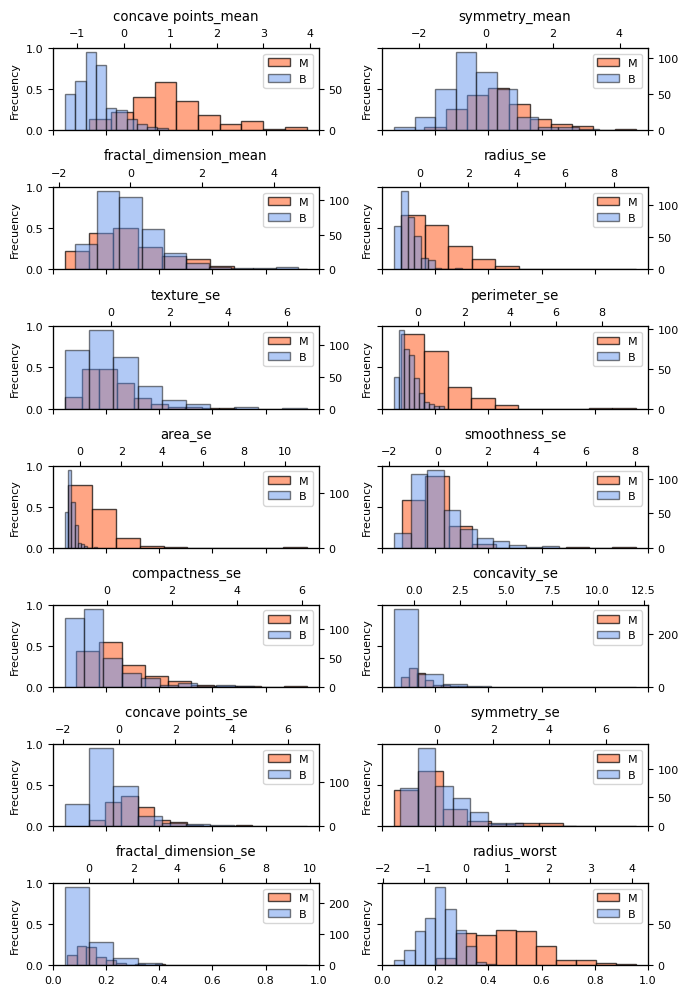

In [150]:
data_total = pd.concat([data_diag, data_new.iloc[:, 0:30]], axis=1)
data_M = data_total[data_total['diagnosis'] =='M']
data_B = data_total[data_total['diagnosis'] =='B']

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(ncols=2,nrows=7, sharex=True, sharey=True, figsize=(7,10))
lista= list(data_total.columns[1:])
for i, ax in enumerate(ax.flat):
  #if (i==6):
  ax.set_title(str(lista[i]))
  ax.set_ylabel('Frecuency')
  ax = ax.twinx().twiny()
  ax.hist(data_M[lista[i]], label='M', alpha=.7, edgecolor='black', color='coral')
  ax.hist(data_B[lista[i]], label="B", alpha=.5, edgecolor='black', color ='cornflowerblue')
  ax.legend()
fig.tight_layout()

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(ncols=2,nrows=7, sharex=True, sharey=True, figsize=(7,10))
lista= list(data_total.columns[1:])
for i, ax in enumerate(ax.flat):
  ax.set_title(str(lista[i+7]))
  ax.set_ylabel('Frecuency')
  ax = ax.twinx().twiny()
  ax.hist(data_M[lista[i+7]], label='M', alpha=.7, edgecolor='black', color='coral')
  ax.hist(data_B[lista[i+7]], label="B", alpha=.5, edgecolor='black', color ='cornflowerblue')
  ax.legend()
fig.tight_layout()

 <p style="text-align: justify;"> Texture, simmetry, smoothness and fractal dimension have similar distribution for malign and benign case. On the other hand, features as radius, area and perimeter (all of them are related) for benign case have a shift towards values below the mean, so tumors that are malignant tend to have a positive correlation with larger values of these parameters. </p>

 In addition, correlation matrix will be studied to determinate posible lineal relation between each feature.

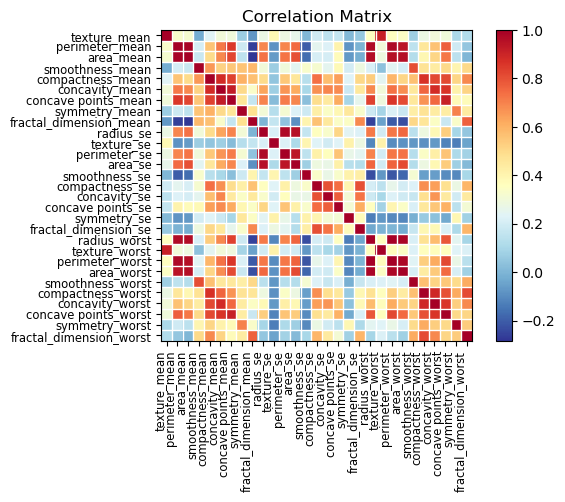

In [121]:
#Studying correlation
corr = data_new.set_index('radius_mean').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.xticks(rotation=90)
plt.show()

 
 <p style="text-align: justify;"> The correlation matrix suggests that variables such as area, perimeter and radius exhibit high correlation, which can be expected due to the mathematical relationship between area, perimeter, and radius. Although it might be beneficial to remove some of these variables, since this document does not have the guidance of a medical professional, all features will be retained. </p>


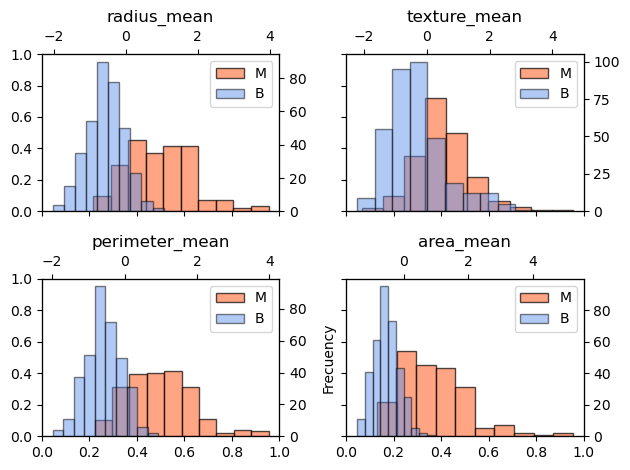